**Problem Statement**

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

**Objective**

we are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes.

SO it's Binary Classification problem

### **DATA**

In [ ]:
!wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv"

--2024-03-05 03:58:01--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.61, 18.172.139.94, 18.172.139.46, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1127673 (1.1M) [text/plain]
Saving to: ‘ola_driver_scaler.csv’

ola_driver_scaler.c 100%[===================>]   1.08M  --.-KB/s    in 0.07s   

2024-03-05 03:58:01 (16.3 MB/s) - ‘ola_driver_scaler.csv’ saved [1127673/1127673]



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("ola_driver_scaler.csv",index_col=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 2.0+ MB


observation:  this seems there are some null values in features

In [ ]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
df.isnull().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [ ]:
# Considering people having lastworking date as churned and else are not churned.

df["IsChurn"] = np.where(df['LastWorkingDate'].isna(),0,1)

In [ ]:
df.drop(['LastWorkingDate'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

MMM-YY                   0
Driver_ID                0
Age                     61
Gender                  52
City                     0
Education_Level          0
Income                   0
Dateofjoining            0
Joining Designation      0
Grade                    0
Total Business Value     0
Quarterly Rating         0
IsChurn                  0
dtype: int64

In [ ]:
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,IsChurn
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899,0.084590
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832,0.278277
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000,0.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000,0.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000,0.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000,1.000000


### **EDA**

**Univariate Analysis**

In [ ]:
df.dtypes

MMM-YY                   object
Driver_ID                 int64
Age                     float64
Gender                  float64
City                     object
Education_Level           int64
Income                    int64
Dateofjoining            object
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
IsChurn                   int64
dtype: object

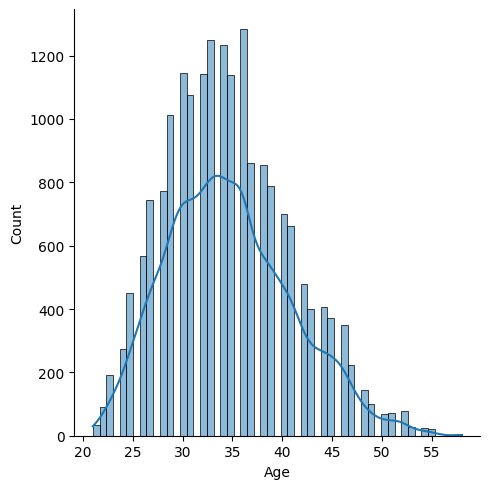

In [ ]:
sns.displot(df['Age'],kde=True)

**Observation:** Looks like Normal Distribution

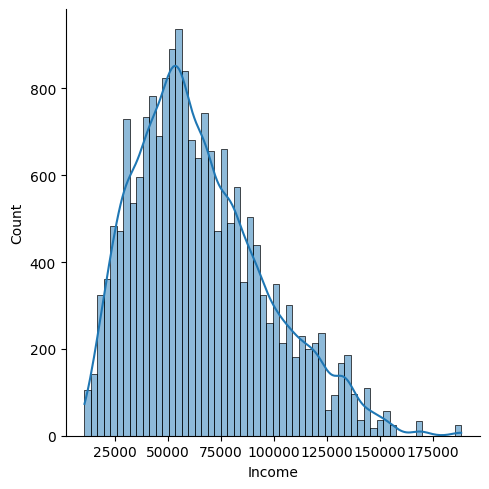

In [ ]:
sns.displot(df['Income'],kde=True)

**Observation:** Looks like right skewed normal Distribution

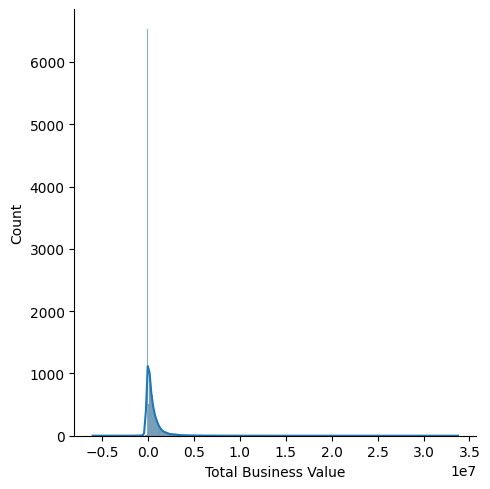

In [ ]:
sns.displot(df['Total Business Value'],kde=True)

**Observation**

most of the times Bussiness value is Zero.

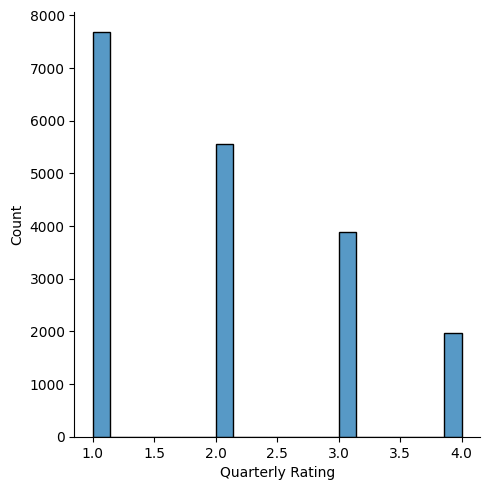

In [ ]:
sns.displot(df['Quarterly Rating'])

**observation:**

there are more low rated drivers than high rated

In [ ]:
df['Education_Level'].value_counts()

1    6864
2    6327
0    5913
Name: Education_Level, dtype: int64

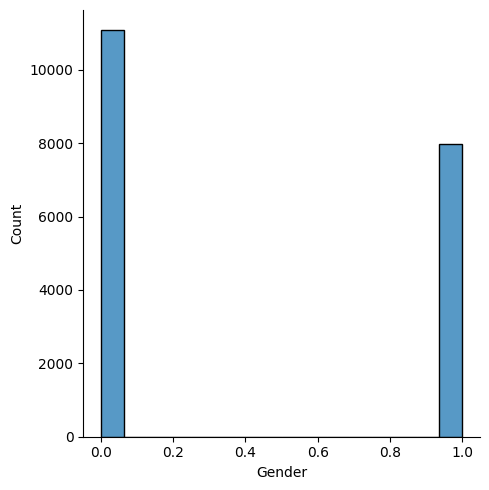

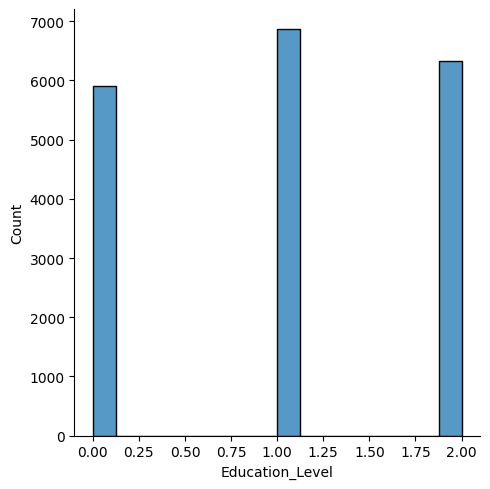

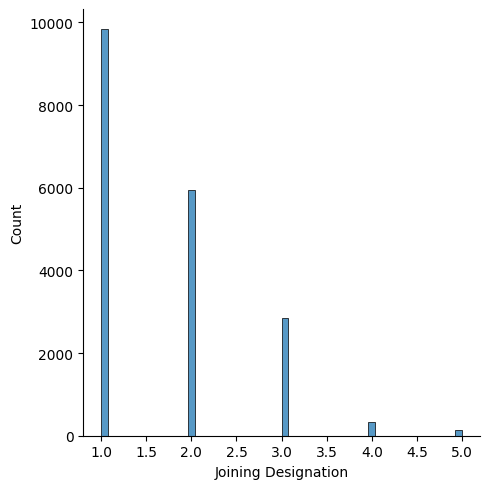

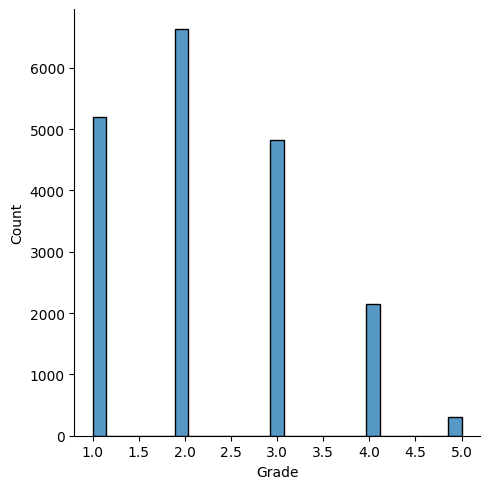

In [ ]:
names = ['Gender',	'Education_Level'	,	'Joining Designation'	  , 'Grade']

for col in names:
  sns.displot(df[col])


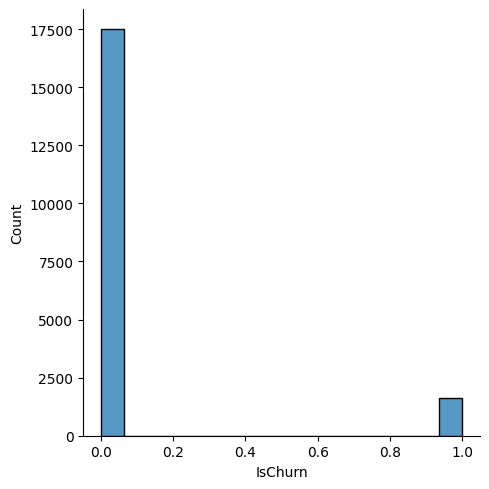

In [ ]:
sns.displot(df['IsChurn'])

**Observation:**

there is High imbalance in classes

In [ ]:
df.select_dtypes(exclude='object')

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,IsChurn
0,1,28.0,0.0,2,57387,1,1,2381060,2,0
1,1,28.0,0.0,2,57387,1,1,-665480,2,0
2,1,28.0,0.0,2,57387,1,1,0,2,1
3,2,31.0,0.0,2,67016,2,2,0,1,0
4,2,31.0,0.0,2,67016,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...
19099,2788,30.0,0.0,2,70254,2,2,740280,3,0
19100,2788,30.0,0.0,2,70254,2,2,448370,3,0
19101,2788,30.0,0.0,2,70254,2,2,0,2,0
19102,2788,30.0,0.0,2,70254,2,2,200420,2,0


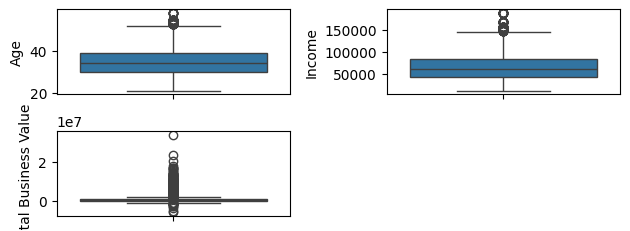

In [ ]:
for i,col in enumerate(['Age',"Income","Total Business Value"]):
  plt.subplot(4,2,i+1)
  sns.boxplot(df[col])
  plt.tight_layout()

In [ ]:
def calculate_outlier_percentage(data, feature, threshold=1.5):

  feature_data = data[feature]
  # Calculate the first and third quartiles (Q1 and Q3) for the feature
  Q1 = np.percentile(feature_data, 25)
  Q3 = np.percentile(feature_data, 75)
  # Calculate the IQR (Interquartile Range) for the feature
  IQR = Q3 - Q1
  # Define the lower and upper bounds for outlier detection for the feature
  lower_bound = Q1 - threshold * IQR
  upper_bound = Q3 + threshold * IQR
  # Identify outlier indices for the feature
  outlier_indices = np.where((feature_data < lower_bound) | (feature_data > upper_bound))
  # Calculate the percentage of outliers
  outlier_percentage = (len(outlier_indices[0]) / len(feature_data)) * 100
  return outlier_percentage


feature_index = 4 # Index of the feature (column) to analyze
threshold = 1.5

for feature in (['Age',"Income","Total Business Value"]):

    outlier_percentage = calculate_outlier_percentage(df, feature, threshold)
    print(f"Percentage of outliers in feature {feature}: {outlier_percentage:.2f}%")



Percentage of outliers in feature Age: 0.00%
Percentage of outliers in feature Income: 0.98%
Percentage of outliers in feature Total Business Value: 7.18%


there is outliers which are in Age,Income are ignorable and Total Business value is having 7% of outliers

**Bivariate Analysis**

<ipython-input-21-dbb09d01d7b9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_corr = df.corr()


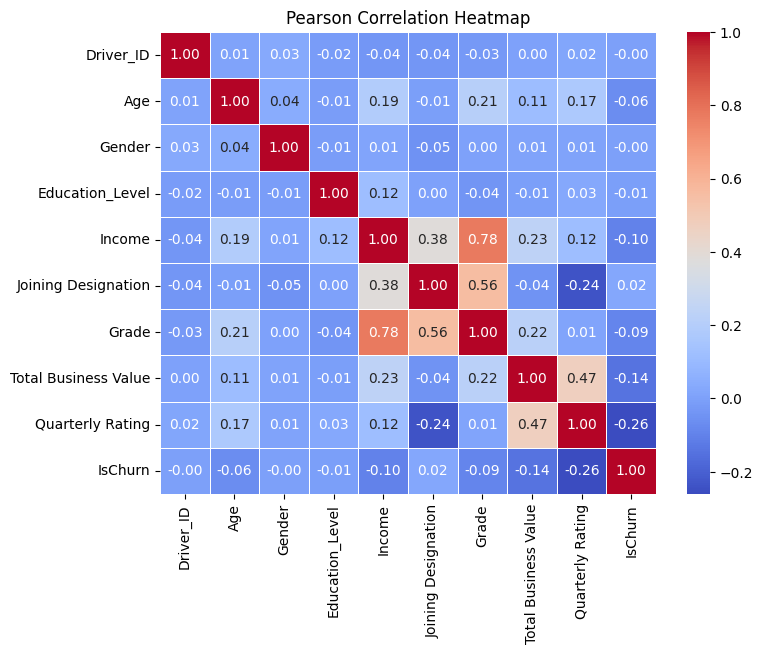

In [ ]:
# Compute Pearson correlation coefficient
pearson_corr = df.corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Heatmap')
plt.show()


**Observation:**

Income and Grade highly Correlated



In [ ]:

df.isnull().sum()

MMM-YY                   0
Driver_ID                0
Age                     61
Gender                  52
City                     0
Education_Level          0
Income                   0
Dateofjoining            0
Joining Designation      0
Grade                    0
Total Business Value     0
Quarterly Rating         0
IsChurn                  0
dtype: int64

### **Feature Engineering**

**KNN Imputation**

try to fill null values using knn imputation

In [ ]:
df2 = df.dropna()    #  non null values df

In [ ]:
df3 = df[df.isna().any(axis=1)]  # null values df

In [ ]:
df2 = df2.drop(['MMM-YY',	'City',	'Dateofjoining'],axis=1)

In [ ]:
X = df2.drop("IsChurn",axis=1)
y = df2['IsChurn'].apply(lambda x: 1 if x==1.0 else 0)

In [ ]:
y.value_counts()

0    17385
1     1606
Name: IsChurn, dtype: int64

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of k values to test
k_values = [1, 3, 5, 7, 9]

# Evaluate performance for each k
best_k = None
best_score = float('inf')  # For MSE, lower is better
for k in k_values:
    # Create and fit the KNN imputer
    imputer = KNNImputer(n_neighbors=k)
    X_train_imputed = imputer.fit_transform(X_train)

    # Evaluate the imputer on validation set
    X_val_imputed = imputer.transform(X_val)
    score = mean_squared_error(X_val, X_val_imputed)

    # Update best_k if this 'k' performs better
    if score < best_score:
        best_score = score
        best_k = k

print("Best k:", best_k)


Best k: 1


In [ ]:
imputer.transform(X_val)


array([[1.30000e+01, 3.00000e+01, 0.00000e+00, ..., 4.00000e+00,
        1.59359e+06, 1.00000e+00],
       [1.28500e+03, 3.10000e+01, 0.00000e+00, ..., 2.00000e+00,
        2.61940e+05, 2.00000e+00],
       [2.02800e+03, 4.00000e+01, 1.00000e+00, ..., 2.00000e+00,
        1.42930e+06, 4.00000e+00],
       ...,
       [2.58200e+03, 4.50000e+01, 0.00000e+00, ..., 1.00000e+00,
        3.00830e+05, 2.00000e+00],
       [3.12000e+02, 3.40000e+01, 0.00000e+00, ..., 2.00000e+00,
        0.00000e+00, 1.00000e+00],
       [2.40800e+03, 4.20000e+01, 0.00000e+00, ..., 4.00000e+00,
        9.12790e+05, 1.00000e+00]])

In [ ]:
imputed_data = imputer.transform(df3.drop(['City' ,'Dateofjoining','MMM-YY',"IsChurn"],axis=1))

In [ ]:
df2['Gender']

0        0
1        0
2        0
3        0
4        0
        ..
19099    0
19100    0
19101    0
19102    0
19103    0
Name: Gender, Length: 18991, dtype: int64

In [ ]:
imputer.get_feature_names_out()

array(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'], dtype=object)

In [ ]:
column_names = imputer.get_feature_names_out()

# Convert imputed data to DataFrame with column names
imputed_df = pd.DataFrame(imputed_data, columns=column_names)

In [ ]:
imputed_df.head()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,20.0,28.888889,1.000000,0.0,40342.0,3.0,3.0,0.0,1.0
1,22.0,34.555556,0.000000,2.0,31224.0,1.0,1.0,200000.0,3.0
2,24.0,38.444444,0.000000,2.0,76308.0,1.0,2.0,203240.0,3.0
3,40.0,31.111111,0.000000,0.0,59182.0,2.0,2.0,0.0,1.0
4,43.0,27.000000,0.555556,0.0,12906.0,1.0,1.0,0.0,1.0


In [ ]:
df3 = df3.reset_index()

In [ ]:
df3

,index,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating,IsChurn
0,72,02/01/20,20,NaN,1.0,C19,0,40342,25/10/19,3,3,0,1,0
1,97,10/01/19,22,NaN,0.0,C10,2,31224,25/05/18,1,1,200000,3,0
2,110,07/01/19,24,NaN,0.0,C24,2,76308,25/05/18,1,2,203240,3,0
3,212,11/01/19,40,NaN,0.0,C15,0,59182,11/08/19,2,2,0,1,0
4,240,02/01/19,43,27.0,NaN,C15,0,12906,13/07/18,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,18843,01/01/19,2751,NaN,0.0,C17,2,53115,11/05/15,1,1,506550,3,0
109,18928,12/01/19,2760,31.0,NaN,C20,0,51471,10/03/19,3,3,0,1,0
110,18953,01/01/19,2765,26.0,NaN,C18,1,38809,10/02/18,1,1,0,1,0
111,19024,02/01/19,2774,NaN,0.0,C15,1,42313,21/07/18,1,1,1141280,4,0


In [ ]:


threshold = 0.5

nan_indices = df3[df3['Gender'].isna()].index

imputed_values = imputed_df['Gender'][nan_indices]

# Replace NaN values with imputed values based on the condition
df3.loc[nan_indices, 'Gender'] = np.where(imputed_values < threshold, 0, 1)


In [ ]:
# Identify NaN values in  DataFrame
nan_indices = df3[df3['Age'].isna()].index

imputed_values = imputed_df['Age'][nan_indices]

# Replace NaN values with imputed values based on the condition
df3.loc[nan_indices, 'Age'] = np.round(imputed_values,1)

In [ ]:
df3 = df3.drop('index',axis=1)

In [ ]:
merged_df = pd.concat([df.dropna(),df3],axis=0)  # merging df of imputed df and non nan df

In [ ]:
merged_df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating,IsChurn
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,1,1,2381060,2,0
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,1,1,-665480,2,0
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,1,1,0,2,1
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,2,2,0,1,0
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,01/01/19,2751,36.1,0.0,C17,2,53115,11/05/15,1,1,506550,3,0
109,12/01/19,2760,31.0,1.0,C20,0,51471,10/03/19,3,3,0,1,0
110,01/01/19,2765,26.0,1.0,C18,1,38809,10/02/18,1,1,0,1,0
111,02/01/19,2774,36.7,0.0,C15,1,42313,21/07/18,1,1,1141280,4,0


In [ ]:
merged_df['year']  = pd.to_datetime(merged_df['MMM-YY']).dt.year
merged_df['month'] = pd.to_datetime(merged_df['MMM-YY']).dt.month
merged_df['day']   = pd.to_datetime(merged_df['MMM-YY']).dt.day

In [ ]:
merged_df['joining_year']  = pd.to_datetime(merged_df['Dateofjoining']).dt.year
merged_df['joining_month'] = pd.to_datetime(merged_df['Dateofjoining']).dt.month
merged_df['joing_day']     = pd.to_datetime(merged_df['Dateofjoining']).dt.day

In [ ]:
reference_date = pd.to_datetime('1990-01-01')
# convertin these  object types to float values to fit models
# Calculate time difference
merged_df['MMM-YY'] = (pd.to_datetime(df['MMM-YY']) - reference_date).dt.days
merged_df['Dateofjoining'] = (pd.to_datetime(df['Dateofjoining']) - reference_date).dt.days

In [ ]:
final_df = pd.get_dummies(merged_df,columns=['City'])

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19104 entries, 0 to 112
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  int64  
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19104 non-null  float64
 3   Gender                19104 non-null  float64
 4   Education_Level       19104 non-null  int64  
 5   Income                19104 non-null  int64  
 6   Dateofjoining         19104 non-null  int64  
 7   Joining Designation   19104 non-null  int64  
 8   Grade                 19104 non-null  int64  
 9   Total Business Value  19104 non-null  int64  
 10  Quarterly Rating      19104 non-null  int64  
 11  IsChurn               19104 non-null  int64  
 12  year                  19104 non-null  int64  
 13  month                 19104 non-null  int64  
 14  day                   19104 non-null  int64  
 15  joining_year         

### **Modeling**

In [ ]:
X = final_df.drop(["IsChurn"],axis=1)
y = final_df['IsChurn']

In [ ]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Class imbalance handled here usign model instead of upsmapling and downsampling

# Calculate class weights
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)



**RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:

# Define the parameter grid
param_grid_rf = {
    'n_estimators': np.arange(50,200,50),
    'max_depth': np.arange(5,20,5),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(class_weight={0: class_weights[0], 1: class_weights[1]},random_state=42)

# Initialize GridSearchCV
grid_search_rf = RandomizedSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='roc_auc')

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print("Best Parameters for Random Forest:", best_params_rf)

# Train the model with best parameters
best_rf_classifier = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_classifier.fit(X_train, y_train)


Best Parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 15}


RandomForestClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=50, random_state=42)

In [ ]:
class_weights


array([0.54726778, 5.78901515])

**XGBoost**

In [ ]:
from xgboost import XGBClassifier

# Define the parameter grid
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 2, 5]
}

ratio = (y_train.value_counts()[0]) / (y_train.value_counts()[1])
# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier(scale_pos_weight=ratio,random_state=42)

# Initialize GridSearchCV
grid_search_xgb = RandomizedSearchCV(xgb_classifier, param_grid_xgb, cv=5, scoring='roc_auc')

# Fit the grid search to the data
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_
print("Best Parameters for XGBoost:", best_params_xgb)

# Train the model with best parameters
best_xgb_classifier = XGBClassifier(**best_params_xgb, random_state=42)
best_xgb_classifier.fit(X_train, y_train)


Best Parameters for XGBoost: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 1.0}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

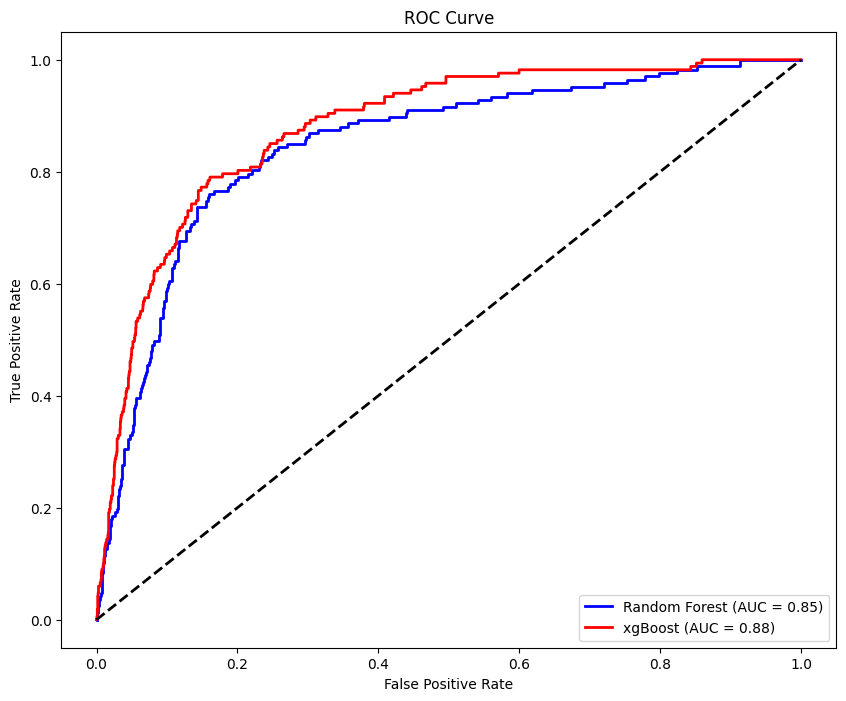

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for each classifier
rf_probs = best_rf_classifier.predict_proba(X_test)[:, 1]
xgboost_probs = best_xgb_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each classifier
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgboost_fpr, xgboost_tpr, _ = roc_curve(y_test, xgboost_probs)

# Compute AUC for each classifier
rf_auc = auc(rf_fpr, rf_tpr)
xgboost_auc = auc(xgboost_fpr, xgboost_tpr)

# Plot ROC curve for each classifier
plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(xgboost_fpr, xgboost_tpr, color='red', lw=2, label=f'xgBoost (AUC = {xgboost_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


**Observation:**

seems Xgboost performing slightly better than Randomforest

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
rf_predictions = best_rf_classifier.predict(X_test)
xgboost_predictions = best_xgb_classifier.predict(X_test)

# Confusion matrix
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
xgboost_conf_matrix = confusion_matrix(y_test, xgboost_predictions)

# Classification report
rf_classification_report = classification_report(y_test, rf_predictions)
xgboost_classification_report = classification_report(y_test, xgboost_predictions)

print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)
print("\nRandom Forest Classification Report:")
print(rf_classification_report)

print("\nxgBoost Confusion Matrix:")
print(xgboost_conf_matrix)
print("\nxgBoost Classification Report:")
print(xgboost_classification_report)


Random Forest Confusion Matrix:
[[1731   13]
 [ 157   10]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1744
           1       0.43      0.06      0.11       167

    accuracy                           0.91      1911
   macro avg       0.68      0.53      0.53      1911
weighted avg       0.87      0.91      0.88      1911


xgBoost Confusion Matrix:
[[1714   30]
 [ 139   28]]

xgBoost Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1744
           1       0.48      0.17      0.25       167

    accuracy                           0.91      1911
   macro avg       0.70      0.58      0.60      1911
weighted avg       0.89      0.91      0.89      1911



**Observation:**

Recall and precision for churn class 1 is better in the case of xgboost compared to Randomforest.

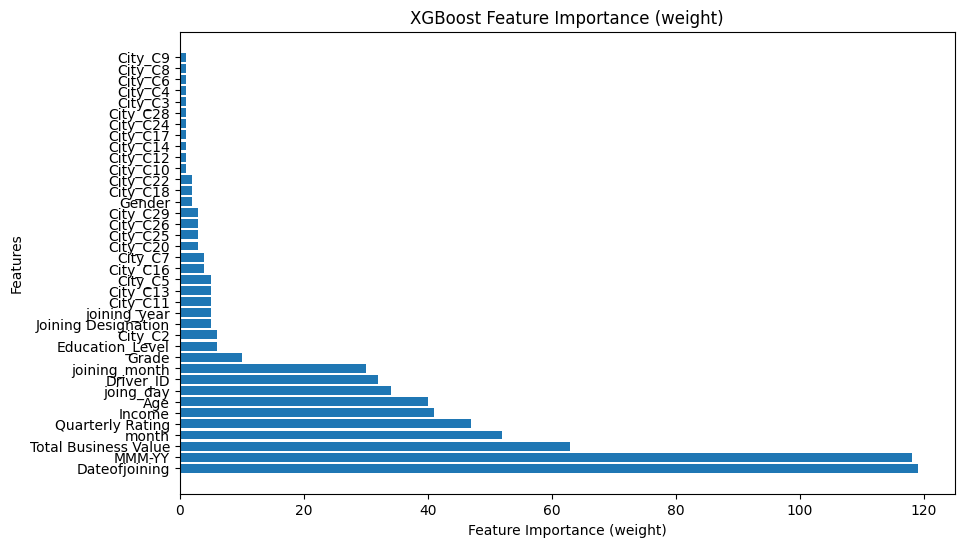

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Train the XGBoost model


# Extract feature importance
importance_type = "weight"  # "weight" or "gain"
feature_importance = best_xgb_classifier.get_booster().get_score(importance_type=importance_type)

# Plot feature importance
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
features, importances = zip(*sorted_feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel(f'Feature Importance ({importance_type})')
plt.ylabel('Features')
plt.title(f'XGBoost Feature Importance ({importance_type})')
plt.show()


Observation:

seems Date of Joining and MMM-YY features contributing more to classification